In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## First we import the data into a dataframe

In [2]:
df = pd.read_csv('train.csv')

## Explore the data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['Name'].unique().size

891

In [7]:
df['Ticket'].unique().size

681

In [8]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### The majority of Cabin column is missing and the Name column is unique across all data so we will drop them

In [10]:
df.drop(['Cabin','Name'],inplace=True,axis=1)

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### There are many missing values in the age column we will fill those by mean age

In [12]:
mean=df['Age'].mean()

In [13]:
df['Age'].fillna(mean, inplace=True)

In [14]:
df['Age'].isnull().any()

False

In [15]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Now we have 2 missing values in Embarked column, fill them by mode as it's categorical

In [16]:
mode=df['Embarked'].mode()[0]
df['Embarked'].fillna(mode,inplace=True)

In [17]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

### Plot some graphs to understand the data

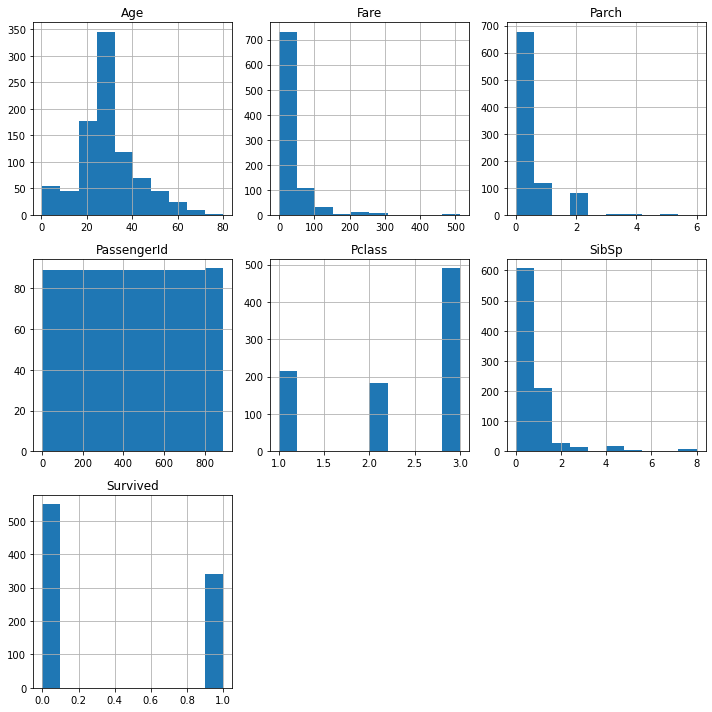

In [18]:
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

## Plot a heatmap to check correlation

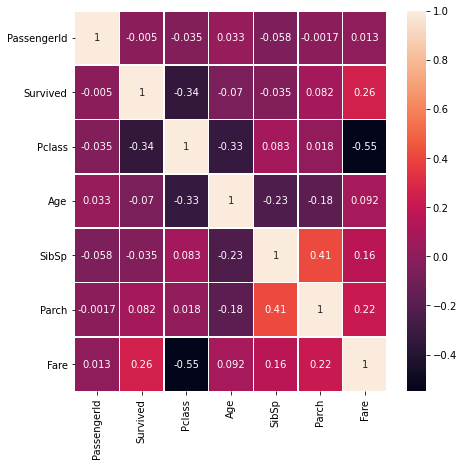

In [19]:
corrmat=df.corr()
corr_features=corrmat.index

plt.figure(figsize=(7,7))
graph = sns.heatmap(df[corr_features].corr(),annot=True,linewidths=0.5)
plt.show()

### Some columns are non-numerical, so we will encode them

In [20]:
df = pd.concat([df,pd.get_dummies(df['Sex'], prefix='Sex')],axis=1)
df = pd.concat([df,pd.get_dummies(df['Embarked'], prefix='Embarked')],axis=1)

### The ticket column was too messy so we will drop it and drop the categorical sex and embarked columns

In [21]:
df.drop(['Sex','Embarked','Ticket'],inplace=True,axis=1)

### Split the data into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [23]:
y_train, x_train = train_set['Survived'], train_set.drop('Survived', axis=1)
y_test, x_test = test_set['Survived'], test_set.drop('Survived', axis=1)

### Prepare Random Forest Classifier model, fit on train data, and predict on test data

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(x_train, y_train)
rf_pred = forest_model.predict(x_test)

### Calculate accuracy

In [25]:
print("{:.4f}".format(accuracy_score(y_test, rf_pred)))

0.8380


### Prepare Random Forest Classifier model, fit on train data, and predict on test data

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

nb_pred = gnb.predict(x_test)

In [27]:
print("{:.4f}".format(accuracy_score(y_test, nb_pred)))

0.7765


## Random Forest Classifier accuracy is higher so we will use it on the final predictions

## Preprocessing test.csv and saving output in csv

In [28]:
df_test=pd.read_csv('test.csv')
df_test.drop(['Cabin','Name'],inplace=True,axis=1)
mode=df_test['Embarked'].mode()[0]
df_test['Embarked'].fillna(mode,inplace=True)

In [29]:
#filling missing data
for col in df_test.columns:
    if(df_test[col].dtype=='O'):
        mode=df_test[col].mode()[0]
        df_test[col].fillna(mode,inplace=True)
    else:
        mean=df_test[col].mean()
        df_test[col].fillna(mean,inplace=True)
        
df_test.isnull().any()

PassengerId    False
Pclass         False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [30]:
#Encoding
df_test = pd.concat([df_test,pd.get_dummies(df_test['Sex'], prefix='Sex')],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['Embarked'], prefix='Embarked')],axis=1)
df_test.drop(['Sex','Embarked','Ticket'],inplace=True,axis=1)

In [31]:
final_preds=forest_model.predict(df_test)

In [32]:
df_test['Survived']=final_preds.tolist()

In [33]:
df_test.to_csv('submit.csv',columns=['PassengerId','Survived'],index=False)